# Exercícios - WithColumn 2/2

## 1. Criar um dataframe para ler o arquivo no HDFS /user/<nome/data/juros_selic/juros_selic

In [17]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [5]:
juros = spark.read.csv('/user/jherfson/data/exercises-data/juros_selic/juros_selic', sep=";", header="true")

In [6]:
juros.show(3)

+----------+-----+
|      data|valor|
+----------+-----+
|01/06/1986| 1,27|
|01/07/1986| 1,95|
|01/08/1986| 2,57|
+----------+-----+
only showing top 3 rows



## 2. Agrupar todas as datas pelo ano em ordem decrescente e salvar a quantidade de meses ocorridos, o valor médio, mínimo e máximo do campo valor com a seguinte estrutura:
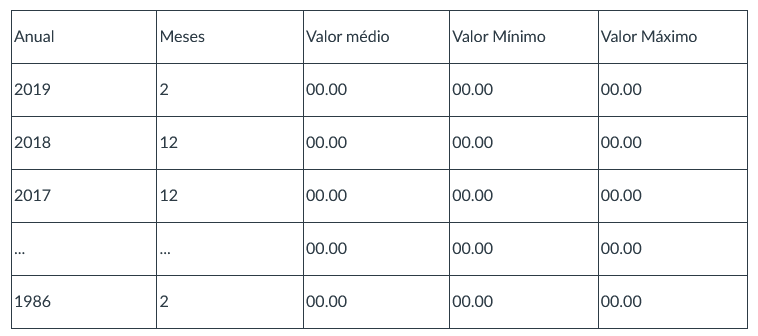

In [18]:
juros_ano = juros.withColumn("ano", split(col("data"), "/").getItem(2))
juros_valor = juros_ano.withColumn("valor", regexp_replace(col("valor"),"\,","\.").cast(FloatType()))

juros_valor.printSchema()

root
 |-- data: string (nullable = true)
 |-- valor: float (nullable = true)
 |-- ano: string (nullable = true)



In [29]:
juros_relatorio = juros_valor.groupBy("ano").agg(count("ano").alias("Meses"), format_number(avg("valor"), 2).alias("valor medio"), min("valor").alias("valor minimo"), max("valor").alias("valor máximo")).sort(desc("ano"))

## 3. Salvar no hdfs:///user/<nome>/relatorioAnual com compressão zlib e formato orc

In [31]:
juros_relatorio.write.orc("/user/jherfson/relatorio_anual", compression="zlib")

In [34]:
!hdfs dfs -ls /user/jherfson/relatorio_anual

Found 35 items
-rw-r--r--   2 root supergroup          0 2022-04-18 15:01 /user/jherfson/relatorio_anual/_SUCCESS
-rw-r--r--   2 root supergroup        585 2022-04-18 15:01 /user/jherfson/relatorio_anual/part-00000-01529a0c-093e-4de3-a3bb-9994e4b8e421-c000.zlib.orc
-rw-r--r--   2 root supergroup        585 2022-04-18 15:01 /user/jherfson/relatorio_anual/part-00001-01529a0c-093e-4de3-a3bb-9994e4b8e421-c000.zlib.orc
-rw-r--r--   2 root supergroup        588 2022-04-18 15:01 /user/jherfson/relatorio_anual/part-00002-01529a0c-093e-4de3-a3bb-9994e4b8e421-c000.zlib.orc
-rw-r--r--   2 root supergroup        575 2022-04-18 15:01 /user/jherfson/relatorio_anual/part-00003-01529a0c-093e-4de3-a3bb-9994e4b8e421-c000.zlib.orc
-rw-r--r--   2 root supergroup        586 2022-04-18 15:01 /user/jherfson/relatorio_anual/part-00004-01529a0c-093e-4de3-a3bb-9994e4b8e421-c000.zlib.orc
-rw-r--r--   2 root supergroup        584 2022-04-18 15:01 /user/jherfson/relatorio_anual/part-00005-01529a0c-093e-4de3-a3bb-9